## Basic Co-Occurrence Analysis of Human-Cell-Atlas Pancreas Topograhic Maps

Data from Tosti et al, 2021

In [1]:
%load_ext autoreload
%autoreload 2


In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [44]:
rel_kernel_path = 'test/ISS-pancreas' #"."


In [91]:
# Define the cluster labels of the pancreas tissue matrix:

cluster_labels = ['background',
 'Acinar-i',
 'Acinar-s',
 'Acinar-REG+',
 'Activated Stellate',
 'Quiescent Stellate',
 'Alpha',
 'Beta',
 'Gamma (PP)',
 'Delta',
 'Ductal',
 'MUC5B+ Ductal (PDG)',
 'MHC Class II',
 'Schwan',
#  'B cell',
#  'T cell',
 'Endothelial']

In [86]:
n_sample = 1

# Load the pancreas tissue matrix:

tissue_matrix = np.load(os.path.join( *rel_kernel_path.split('/'), 'data','sample_matrices.npz'))['sample_'+str(n_sample)]

/tmp/ipykernel_39323/2195890875.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_elements = [plt.scatter([],[],c=plt.cm.nipy_spectral(i/len(cluster_labels)),label=cluster_labels[i]) for i in range(len(cluster_labels))]


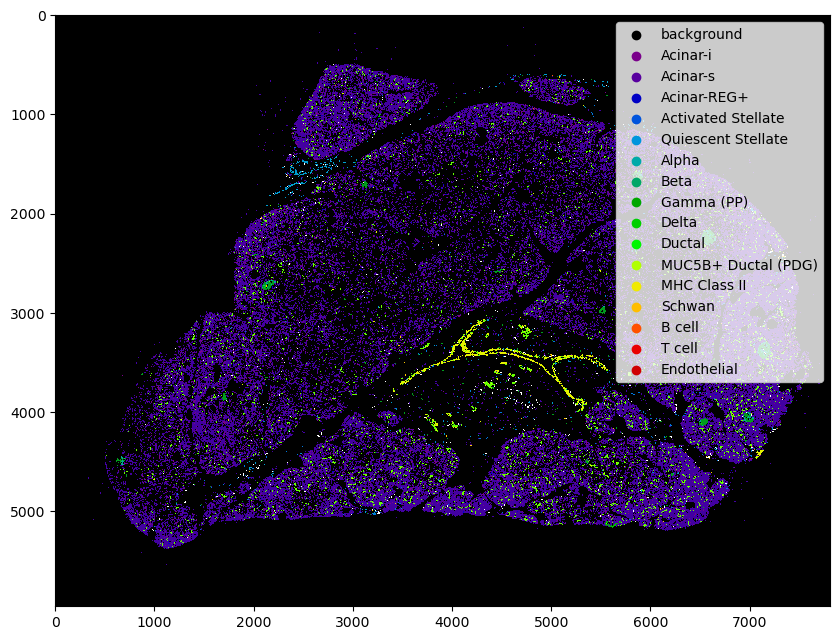

In [92]:
plt.figure(figsize=(10,10))
plt.imshow(tissue_matrix.argmax(axis=0),cmap='nipy_spectral',interpolation='none',vmax=len(cluster_labels)-1,alpha=(tissue_matrix.sum(0)!=0).astype(float))

# Create a legend for different tissue types:
legend_elements = [plt.scatter([],[],c=plt.cm.nipy_spectral(i/len(cluster_labels)),label=cluster_labels[i]) for i in range(len(cluster_labels))]

plt.legend(handles=legend_elements,loc='upper right')